In [ ]:
!pip install imdlib

In [ ]:
import pandas as pd
df= pd.read_csv("/content/final_haryana.csv")



In [ ]:
df = df[~df["Locat"].isna()]

In [ ]:
df["Locat"].isna().sum()

0

In [ ]:


df['locat'] = df['Block'].astype(str) + ',' + df['District'].astype(str) +",Chhattisgarh"




In [ ]:
df['Locat']

0                      Akola, Agra
1                        Bah, Agra
2               Barauli Ahir, Agra
3                   Bichpuri, Agra
4                   Etmadpur, Agra
                  ...             
834             Cholapur, Varanasi
835              Harhuwa, Varanasi
836    Kashi Vidya Peeth, Varanasi
837               Pindra, Varanasi
838             Sewapuri, Varanasi
Name: Locat, Length: 839, dtype: object

In [ ]:
import geopy


def get_coordinates_by_geopy(location):
  # Create a geocoder object using the Nominatim service
  geocoder = geopy.Nominatim(user_agent="my_app")
  # Check if the location is empty
  if location == "":
    return None
  # Try to geocode the location and get the location object
  try:
    locat = geocoder.geocode(location)
    # If the location is found, return the coordinates as a tuple
    if locat:
      return (locat.latitude, locat.longitude)
    # If the location is not found, delete the first word from the location and recursively call the function
    else:
      location = location.replace(location[0], "", 1)
      return get_coordinates_by_geopy(location)
  # Handle any exceptions that may occur
  except Exception as e:
    print("Error: ", e)
    return None


In [ ]:
# Import the geopy module
import geopy


# Define a function that takes a location as a parameter and returns the coordinates as a tuple
def get_coordinates_by_geopy(location):
  # Create a geocoder object using the Nominatim service
  geocoder = geopy.Nominatim(user_agent="my_app")
  # Try to geocode the location and get the location object
  try:
    locat = geocoder.geocode(location)
    # If the location is found, return the coordinates as a tuple
    if locat:
      return (locat.latitude, locat.longitude)
    # If the location is not found, split the location by spaces and get the last word

    else:

      last_word = location.split(", ")[-1]
      # Try to geocode the last word and get the location object
      locat = geocoder.geocode(last_word)
      # If the location is found, return the coordinates as a tuple
      if locat:
        return (locat.latitude, locat.longitude)
      # If the location is not found, return None
      else:
        return None
  # Handle any exceptions that may occur
  except Exception as e:
    print("Error: ", e)
    return None







In [ ]:
df["coordinates"] = df["Locat"].apply(get_coordinates_by_geopy)

In [ ]:
df["coordinates"].isna().sum()

In [ ]:
df = df[~df["coordinates"].isna()]

In [ ]:
df2= df[df['coordinates'].isnull()]

In [ ]:
df2

In [ ]:
import imdlib

start_yr = 2021
end_yr = 2021
variable = 'tmax'

file_dir = (r'/content/sample_data/data') #Path to save the files
data = imdlib.get_data(variable, start_yr, end_yr,'yearwise', file_dir)
data

Downloading: maxtemp for year 2021
Download Successful !!!


In [ ]:
import imdlib

start_yr = 2021
end_yr = 2021
variable = 'rain'

file_dir = (r'/content/sample_data/data2') #Path to save the files
data2 = imdlib.get_data(variable, start_yr, end_yr,'yearwise', file_dir)
data2

Downloading: rain for year 2021
Download Successful !!!


In [ ]:
def avg_daily(location, data):
  lat0=location[0]
  lat0=float(lat0)
  lat = f' {lat0:.2f}'
  lon0=location[1]
  lon = f' {lon0:.2f}'
  data.to_csv('test.csv',lat0,lon0)
  rf= 'test_'+str(lat)+'_'+str(lon)+'.csv'
  rf = rf.replace (' ', '')
  df2= pd.read_csv(rf)
  me =df2.iloc[:,-1].mean()

  return me


In [ ]:
def ram(lat,lon,data):
   lat0 = f' {lat:.2f}'
   lon0 = f' {lon:.2f}'
   lat=round(lat,2)
   lon=round(lon,2)
   data.to_csv('test.csv',lat,lon)
   rf= 'test_'+str(lat0)+'_'+str(lon0)+'.csv'
   rf = rf.replace (' ', '')
   df2= pd.read_csv(rf)
   me =df2.iloc[:,-1].mean()
   return me


In [ ]:

for i in range(0,len(df)):
  df["temp"][i]= avg_daily(df["coordinates"][i],data)
  c=i

In [ ]:
import pandas as pd
df = pd.read_csv("/content/bihar_final.csv")

In [ ]:
df.dtypes

Unnamed: 0       int64
SN               int64
District        object
Block           object
Location        object
pH             float64
EC               int64
TDS            float64
TH as cac03    float64
Ca2+             int64
Mg2+           float64
Na+            float64
K+             float64
CO3-             int64
HCO2-          float64
Cl -           float64
SO2-           float64
NO3-           float64
F-             float64
PO3-           float64
SiO2           float64
lat            float64
long           float64
prep           float64
dtype: object

In [ ]:
df["prep"]=0

In [ ]:
df["temp"]=0

In [ ]:
for i in range(0,len(df)):
  #df["prep"][i]=ram(df["Lat"][i],df["Long"][i],data2)
  df["temp"][i]=ram(df["lat"][i],df["long"][i],data)
  c=i
print(c)

<ipython-input-87-170e784b3a46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temp"][i]=ram(df["lat"][i],df["long"][i],data)


276


In [ ]:
c

537

In [ ]:
df['prep'].isnull().sum()

0

In [ ]:
negative_prep_rows = df[df["prep"] < 0].index

# Drop the rows from the DataFrame
df = df.drop(negative_prep_rows)

In [ ]:
len(df)

842

In [ ]:
negative_prep_rows = df[df["temp"] < 0].index

# Drop the rows from the DataFrame
df = df.drop(negative_prep_rows)

In [ ]:
len(df)

277

In [ ]:
df2

,S.N,District,Block,Location,pH*,EC*,CO,HC,Cl*,SO4,...,PO4,Ca*,Mg,Na,K,SiO,TH,Locat,coordinates,prep


In [ ]:
from google.colab import files

# Save dataframe as csv file
df.to_csv ('final_bihar.csv')

# Download csv file
files.download ('final_chasstigarh.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

In [ ]:
# Delete all csv files from the current directory
!rm *.csv


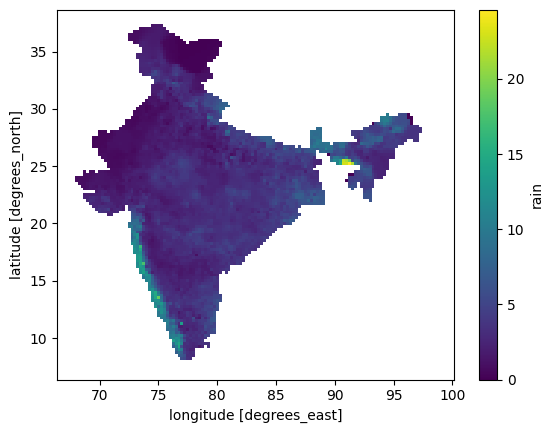

In [ ]:
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()